# STATISTIC FOR BUSINESS - MOBILE PRICE PREDICTION

### Library Import

In [1]:
#import load data library
import pandas as pd
import numpy as np

#import visaulization library
import seaborn as sns
import matplotlib.pyplot as plt

#import statistical test library
from scipy.stats import f_oneway

#import modelling library
import statsmodels.formula.api as smf

#import warnings library
import warnings
warnings.filterwarnings('ignore')



### Other Settings

In [2]:
#other settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1. Data Acquisition

### 1.1. Read Data

In [3]:
#membaca data
data = pd.read_csv('Cellphone.csv', delimiter=',')

#menampilkan data
data.head(10)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


## 2. Data Preparation

### 2.1 menghapus kolom yang tidak digunakan

In [4]:
kolom = ['Product_id','Sale','cpu freq'] #Kolom yang akan dihapus

#menghapus kolom yang tidak digunakan
data = data.drop(columns=kolom)

In [5]:
data.head(5)

,Price,weight,resoloution,ppi,cpu core,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,135.0,5.2,424,8,16.0,3.000,13.00,8.0,2610,7.4
1,1749,125.0,4.0,233,2,4.0,1.000,3.15,0.0,1700,9.9
2,1916,110.0,4.7,312,4,8.0,1.500,13.00,5.0,2000,7.6
3,1315,118.5,4.0,233,2,4.0,0.512,3.15,0.0,1400,11.0
4,1749,125.0,4.0,233,2,4.0,1.000,3.15,0.0,1700,9.9


### 2.2. mengganti nama kolom

In [6]:
#mengganti nama kolom
data.columns = ['Price','weight','resoloution','ppi','cpu_core','internal_mem','ram','Rear_Cam','Front_Cam','battery','thickness']

In [7]:
data.head(5)

,Price,weight,resoloution,ppi,cpu_core,internal_mem,ram,Rear_Cam,Front_Cam,battery,thickness
0,2357,135.0,5.2,424,8,16.0,3.000,13.00,8.0,2610,7.4
1,1749,125.0,4.0,233,2,4.0,1.000,3.15,0.0,1700,9.9
2,1916,110.0,4.7,312,4,8.0,1.500,13.00,5.0,2000,7.6
3,1315,118.5,4.0,233,2,4.0,0.512,3.15,0.0,1400,11.0
4,1749,125.0,4.0,233,2,4.0,1.000,3.15,0.0,1700,9.9


### 2.3. Data cleansing

#### 2.3.1. Missing values

In [8]:
#Identifikasi missing values
data.isna().sum()

Price           0
weight          0
resoloution     0
ppi             0
cpu_core        0
internal_mem    0
ram             0
Rear_Cam        0
Front_Cam       0
battery         0
thickness       0
dtype: int64

#### 2.3.2. Duplikat Data

In [9]:
#identifikasi duplicated data
data_duplikat = data[data.duplicated()]

# Menampilkan data duplikat
data_duplikat

,Price,weight,resoloution,ppi,cpu_core,internal_mem,ram,Rear_Cam,Front_Cam,battery,thickness
4,1749,125.0,4.00,233,2,4.000,1.000,3.15,0.0,1700,9.9
7,2137,150.0,5.50,401,4,16.000,2.000,16.00,8.0,2500,9.5
8,1315,118.5,4.00,233,2,4.000,0.512,3.15,0.0,1400,11.0
14,2580,145.0,5.10,432,4,16.000,2.000,16.00,2.0,2800,8.1
18,1612,141.0,5.00,294,4,8.000,1.500,8.00,1.2,2040,10.0
19,1238,134.1,4.00,233,2,8.000,1.000,2.00,0.0,1560,11.7
20,2438,162.0,5.30,277,8,32.000,4.000,13.00,8.0,4000,7.7
23,2744,174.0,5.60,524,4,32.000,3.000,16.00,3.7,3000,8.3
26,2006,161.0,5.50,200,8,4.000,1.000,5.00,0.0,2500,8.9
27,2938,168.0,5.50,534,4,32.000,4.000,12.30,8.0,3450,8.5


In [10]:
#menghandle data duplikat
data_duplikat_handle = data.drop_duplicates().reset_index(drop=True)

#menampilkan data duplikat
data_duplikat_handle[data_duplikat_handle.duplicated()]

,Price,weight,resoloution,ppi,cpu_core,internal_mem,ram,Rear_Cam,Front_Cam,battery,thickness


In [11]:
#mengubah nama tabel
data = data_duplikat_handle

### 2.4. Exploratory Data Analyst

#### 2.4.1. Distribusi Variabel Price

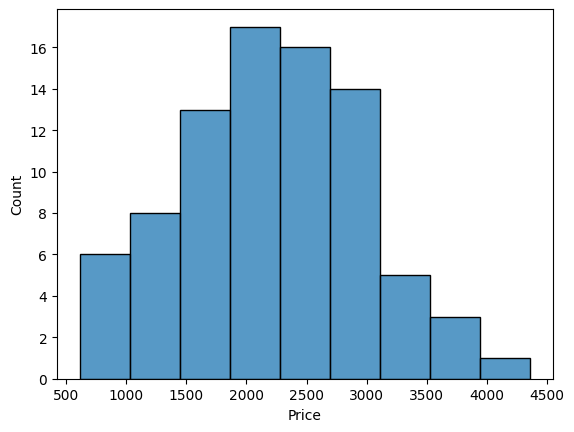

Rata - Rata harga = 2219.08 $


In [12]:
#Melihat distribusi kolom price
sns.histplot(data, x='Price')
plt.show()

#Melihat rata rata price
rerata_price = data['Price'].mean()
print(f'Rata - Rata harga = {round(rerata_price, 2)} $')

#### 2.4.2. Variance harga ponsel berdasakan jumlah core

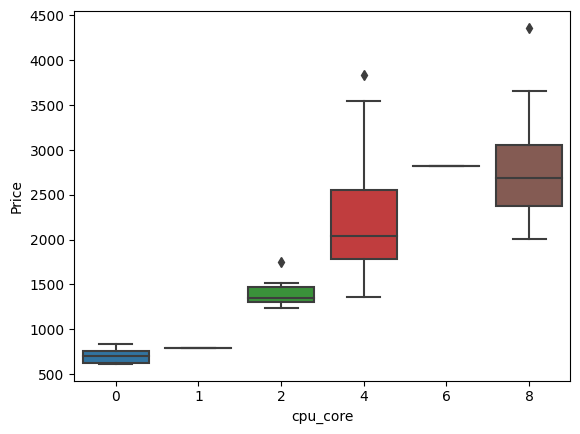

In [13]:
#menampilkan varians harga berdasarkan cpu_core
sns.boxplot(data, x='cpu_core', y='Price')
plt.show()

#### 2.4.3. Heatmap korelasi

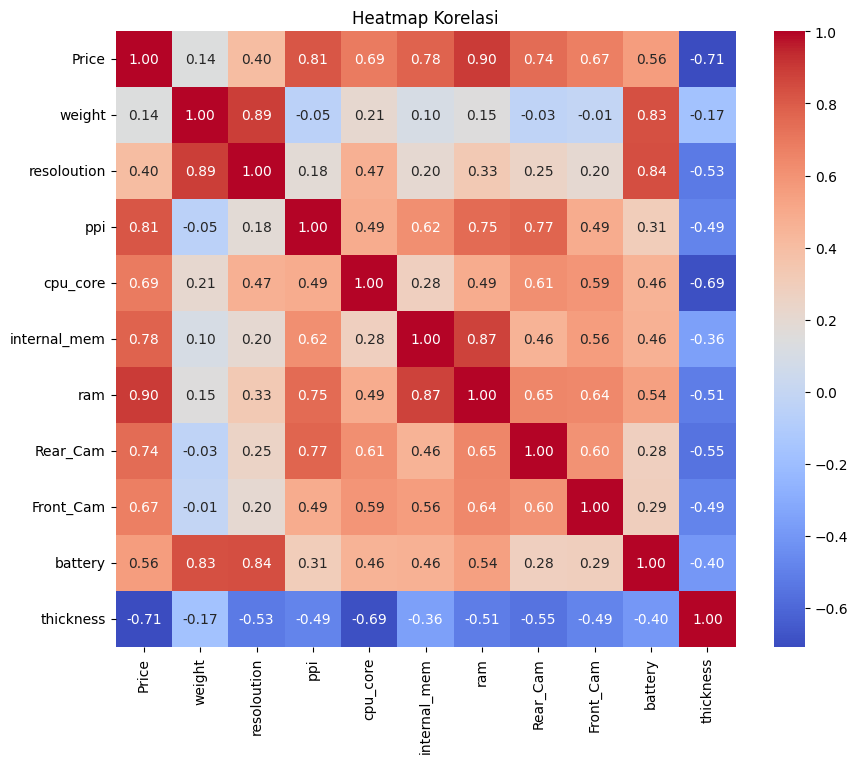

In [14]:
#menghitung koef correlation
koef_korelasi = data.corr()

#membuat visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(koef_korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [15]:
#menampilkan urutan koef korelasi tiap variabel predictor terhadap variabel Price
correlation_matrix = data.corr()
price_correlation = correlation_matrix['Price'].abs().sort_values(ascending=False)

price_correlation

Price           1.000000
ram             0.896040
ppi             0.814855
internal_mem    0.778957
Rear_Cam        0.740738
thickness       0.709908
cpu_core        0.688402
Front_Cam       0.674465
battery         0.558053
resoloution     0.403869
weight          0.143802
Name: Price, dtype: float64

## 3. Statistical Test

Untuk melakukan uji ANOVA, hipotesisnya yaitu:

H0 : Tidak ada perbedaan signifikan rata rata harga ponsel berdasarkan jumlah corenya

H1 : ada perbedaan signifikan rata rata harga ponsel berdasarkan jumlah corenya

In [16]:
# Melakukan pengelompokkan data berdasarkan jumlah core
groups = [data[data['cpu_core'] == core]['Price'] for core in data['cpu_core'].unique()]

# Melakukan uji ANOVA
f_statistic, p_value = f_oneway(*groups)

# Menampilkan hasil uji
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Melakukan pengambilan keputusan
alpha = 0.05
if p_value < alpha:
    print(f"P-value < {alpha}")
    print("Terdapat perbedaan signifikan rata rata harga ponsel berdasarkan jumlah corenya.")
else:
    print(f"P-value > {alpha}")
    print("Tidak terdapat perbedaan signifikan rata rata harga ponsel berdasarkan jumlah corenya.")

F-statistic: 18.71
P-value: 0.0000
P-value < 0.05
Terdapat perbedaan signifikan rata rata harga ponsel berdasarkan jumlah corenya.


## 4. Regression Model

### 4.1. Single Predictor (ram with Price)

In [17]:
def print_coef_std_err(model_fit):
    """
    menggabungkan koefisien estimasi dan standard error ke dalam bentuk data frame
   
    """
    coef = model_fit.params
    std_err = model_fit.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

# membangun model 
model = smf.ols('Price ~ ram', data)

# melakukan fitting model
model_fit_ram = model.fit()

# mengekstrak ke dalam bentuk data frame
result_price_ram = print_coef_std_err(model_fit_ram)

#menampilkan koefisien estimasi
result_price_ram

,coef,std err
Intercept,1279.500483,63.863099
ram,426.728353,23.492988


Dari persamaan tersebut, kita dapat menginterpretasikannya sebagai berikut:

1. Ponsel yang memiliki ram 0 memiliki rata rata harga sebesar 1279

2. Jika membandingkan dua ponsel yang memiliki perbedaan selisih ram 1 poin, maka ponsel yang memiliki ram lebih tinggi 1 GB memiliki rata rata harga 427 lebih tinggi

#### 4.1.1. Model Evaluation

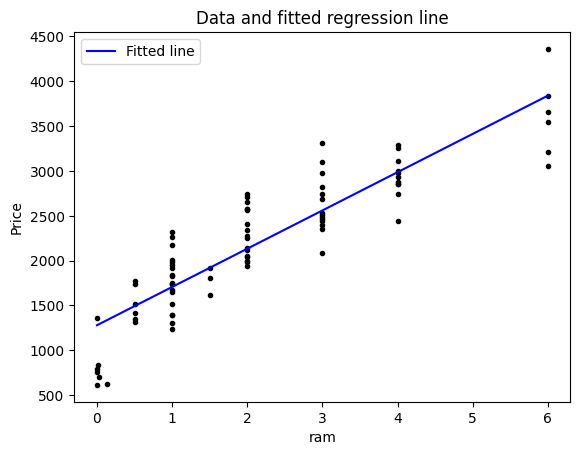

In [18]:
predictor = "ram"
outcome = "Price"
data = data.copy()
results_ = result_price_ram.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("Price")
plt.xlabel("ram")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [19]:
#menghitung rsquared
model_fit_ram.rsquared

0.8028878405118381

Didapatkan R-squared dari model tersebut yaitu 0,8. Angka tersebut bisa dibilang cukup baik untuk sebuah model regresi.

### 4.2. Multiple Predictor

In [20]:
#membangun model 
model = smf.ols('Price ~ ram + ppi + internal_mem + Rear_Cam + thickness + cpu_core + Front_Cam + battery + resoloution + weight', data)

#melakukan fitting model
model_fit_all = model.fit()

#mengekstrak ke dalam bentuk data frame
result_price_all = print_coef_std_err(model_fit_all)

#menampilkan OLS Regressiion Results
model_fit_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     133.6
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           2.42e-42
Time:                        20:45:25   Log-Likelihood:                -544.85
No. Observations:                  83   AIC:                             1112.
Df Residuals:                      72   BIC:                             1138.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1670.8199    320.981      5.205      0.000    1030.957    2310.683
ram            110.0871     36.860      2.987      0.004      36.607     183.567
ppi              1.2782      0.296      4.325      0.000       0.689       1.867
internal_mem     5.0989      1.662      3.069      0.003       1.786       8.411
Rear_Cam         3.7169      6.266      0.593      0.555      -8.774      16.208
thickness      -74.7498     18.691     -3.999      0.000    -112.010     -37.490
cpu_core        49.6574     14.527      3.418      0.001      20.699      78.616
Front_Cam        3.8149      7.179      0.531      0.597     -10.495      18.125
battery          0.1465      0.045      3.268      0.002       0.057       0.236
resoloution    -13.0792     56.716     -0.231      0.818    -126.140      99.981
weight          -1.3490      0.958     -1.408      0.163      -3.259       0.560
==============================================================================
Omnibus:                        0.141   Durbin-Watson:                   2.583
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.329
Skew:                           0.026   Prob(JB):                        0.848
Kurtosis:                       2.696   Cond. No.                     5.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Terlihat dari OLS regression result, terdapat beberapa variabel predictor yang memiliki P-value di atas 0,05. Di antaranya yaitu Rear_Cam, Front_Cam, Resoloution, dan weight.

In [21]:
#membangun model 
model = smf.ols('Price ~ ram + ppi + internal_mem +  thickness + cpu_core +  battery', data)

#melakukan fitting model
model_fit_filter = model.fit()

#mengekstrak ke dalam bentuk data frame
result_price_filter = print_coef_std_err(model_fit_filter)

#melakukan evaluasi model dengan melihat Adj. R-squared dari OLS Regression Results
model_fit_filter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     208.0
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           4.80e-45
Time:                        20:45:25   Log-Likelihood:                -549.66
No. Observations:                  83   AIC:                             1113.
Df Residuals:                      76   BIC:                             1130.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1544.1814    186.805      8.266      0.000    1172.128    1916.235
ram            133.2668     36.264      3.675      0.000      61.040     205.493
ppi              1.4540      0.251      5.782      0.000       0.953       1.955
internal_mem     5.9143      1.613      3.666      0.000       2.701       9.127
thickness      -71.6484     13.866     -5.167      0.000     -99.266     -44.031
cpu_core        61.4114     13.228      4.642      0.000      35.065      87.758
battery          0.0305      0.020      1.543      0.127      -0.009       0.070
==============================================================================
Omnibus:                        0.247   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.422
Skew:                           0.085   Prob(JB):                        0.810
Kurtosis:                       2.695   Cond. No.                     2.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Terlihat nilai Adj. R-squared yaitu 0,938. Berarti model ini bisa dikatakan bagus karena bisa menjelaskan 94 % varians

In [22]:
#centering ppi
data['ppi_center_mean'] = data['ppi'] - data['ppi'].mean()

#centering internal_mem dengan menjadikan 32 GB sebagai center/baseline
data['internal_mem_center_32gb'] = data['internal_mem'] - 32

#centering ram dengan menjadikan 3 GB sebagai center/baseline
data['ram_center_3gb'] = data['ram'] - 3

#centering thickness
data['thickness_center_mean'] = data['thickness'] - data['thickness'].mean()

#centering cpu_core dengan manjadikan 4 sebagai center/baseline
data['cpu_core_center_4'] = data['cpu_core'] - 4

#centering battery dan mengubah skala menjadi per seratus
data['battery_center_meanPerSeratus'] = (data['battery'] - data['battery'].mean())/100

In [23]:
#membangun model 
model = smf.ols('Price ~ ram_center_3gb + ppi_center_mean + internal_mem_center_32gb +  thickness_center_mean + cpu_core_center_4 + battery_center_meanPerSeratus', data)

#melakukan fitting model
model_fit_end = model.fit()

#mengekstrak ke dalam bentuk data frame
result_price_end = print_coef_std_err(model_fit_end)

result_price_end

,coef,std err
Intercept,2316.163191,32.562036
ram_center_3gb,133.266815,36.264315
ppi_center_mean,1.454006,0.251472
internal_mem_center_32gb,5.914347,1.613282
thickness_center_mean,-71.648389,13.866472
cpu_core_center_4,61.411372,13.228340
battery_center_meanPerSeratus,3.052961,1.978274


Dari koefisien yang saya dapat, berikut interpretasinya:

Intercept : Ponsel untuk spesifikasi ram 3GB, internal memory 32GB, jumlah core 4, serta ppi, thickness dan battery yang berada di rata rata memiliki rata rata harga sebesar 2316 $

ram : Membandingkan 2 ponsel yang memiliki ppi, internal memori, thickness, jumlah core dan kapasitas baterai yang sama, ponsel yang memiliki ram 1 GB lebih tinggi memiliki rata rata harga lebih tinggi 133$.

ppi : Membandingkan 2 ponsel yang memiliki ram, internal memori,thickness, jumlah core dan kapasitas baterai yang sama, ponsel yang memiliki ppi 1 poin lebih tinggi memiliki rata rata harga lebih tinggi. 1,4$.

internal memori : Membandingkan 2 ponsel yang memiliki ram, ppi, thickness, jumlah core dan kapasitas baterai yang sama, ponsel dengan internal memori 1GB lebih tinggi memiliki rata rata harga lebih tinggi 5,9$.

thickness : Membandingkan 2 ponsel yang memiliki ram, ppi, internal memori, jumlah core dan kapasitas baterai yang sama, ponsel dengan thickness 1 mm lebih rendah memiliki rata rata harga lebih tinggi 72$.

cpu_core : Membandingkan 2 ponsel yang memiliki ram, ppi, internal memori, thickness, dan kapasitas baterai yang sama, ponsel dengan jumlah core lebih 1 poin memiliki rata rata harga lebih tinggi 61$.

battery : Membandingkan 2 ponsel yang memiliki ram, ppi, internal memori, thickness, dan jumlah core yang sama, ponsel dengan battery 100 poin lebih banyak memiliki rata rata harga lebih tinggi 3$.

SyntaxError: invalid syntax (3528599804.py, line 1)

In [ ]:
p